# Оценка параметров смеси распределений Пуассона методом моментов

## Постановка задачи
Рассматривается модель смеси двух распределений Пуассона:

$$ P(X=k) = \frac{1}{2}\left(\frac{\lambda_1^k}{k!}e^{-\lambda_1} + \frac{\lambda_2^k}{k!}e^{-\lambda_2}\right), $$

где $0 < \lambda_1 < \lambda_2$.

Цель проекта — оценить параметры $(\lambda_1, \lambda_2)$ методом моментов
на основе наблюдаемых частот $n_k$.

## Данные
Частоты наблюдений случайной величины $X$:

| k | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |
|---|---|---|---|---|---|---|---|---|---|---|----|
| n_k | 28 | 47 | 81 | 67 | 53 | 24 | 13 | 8 | 3 | 2 | 1 |

Общее число наблюдений: $n = 327$.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, exp, factorial

## Ввод данных

In [5]:
k = np.array([0,1,2,3,4,5,6,7,8,9,10])
n_k = np.array([28,47,81,67,53,24,13,8,3,2,1])
n = np.sum(n_k)

print("Total observations n =", n)

Total observations n = 327


## Метод моментов

Первый момент:
$$ m_1 = E[X] = \frac{\sum k n_k}{n} $$

Второй момент:
$$ m_2 = E[X^2] = \frac{\sum k^2 n_k}{n} $$

Для смеси Пуассона:
$$ \lambda_1 + \lambda_2 = 2 m_1 $$
$$ \lambda_1^2 + \lambda_2^2 = 2(m_2 - m_1) $$

In [6]:
m1 = np.sum(k * n_k) / n
m2 = np.sum((k**2) * n_k) / n

print("First moment m1 =", m1)
print("Second moment m2 =", m2)

First moment m1 = 2.837920489296636
Second moment m2 = 11.425076452599388


## Оценка параметров смеси

Обозначим:
$$ S = \lambda_1 + \lambda_2 = 2m_1 $$
$$ Q = \lambda_1^2 + \lambda_2^2 = 2(m_2 - m_1) $$

Тогда:
$$ \lambda_1 \lambda_2 = \frac{S^2 - Q}{2} $$

Параметры находятся как корни квадратного уравнения:
$$ t^2 - S t + \lambda_1\lambda_2 = 0 $$

In [7]:
S = 2 * m1
Q = 2 * (m2 - m1)
P = (S**2 - Q) / 2

D = S**2 - 4 * P

lambda1 = (S - sqrt(D)) / 2
lambda2 = (S + sqrt(D)) / 2

print("Estimated lambda1 =", lambda1)
print("Estimated lambda2 =", lambda2)

Estimated lambda1 = 2.107603257038562
Estimated lambda2 = 3.56823772155471


## Визуализация: эмпирическое vs теоретическое распределение

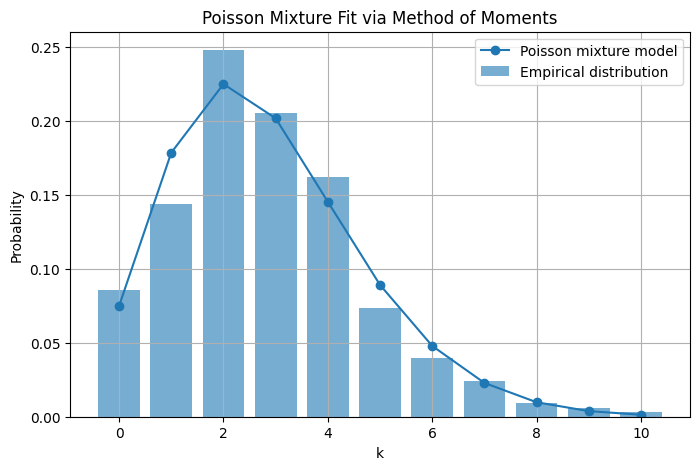

In [8]:
p_emp = n_k / n

def poisson_pmf(k, lam):
    return lam**k * exp(-lam) / factorial(k)

p_theor = [0.5 * (poisson_pmf(ki, lambda1) + poisson_pmf(ki, lambda2)) for ki in k]

plt.figure(figsize=(8,5))
plt.bar(k, p_emp, alpha=0.6, label="Empirical distribution")
plt.plot(k, p_theor, marker='o', label="Poisson mixture model")
plt.xlabel("k")
plt.ylabel("Probability")
plt.title("Poisson Mixture Fit via Method of Moments")
plt.legend()
plt.grid(True)
plt.show()

## Выводы

- Были вычислены выборочные моменты первого и второго порядка.
- Получены оценки параметров смеси распределений Пуассона методом моментов.
- Проведено сравнение эмпирического распределения и теоретической модели.

Данный подход демонстрирует применение статистического моделирования
в задачах анализа экспериментальных данных.